# Exploring and Cleaning the Data

### Imports. Path Definitions, and Read Project Data

In [121]:
from datetime import datetime, date, time, timedelta

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno as msno

# Set path to images
p_images = '../reports/images/'

In [122]:
# import the data from a csv-file
df = pd.read_csv('../data/eda.csv')

## Exploring

#### Check for Missing Values

<Axes: >

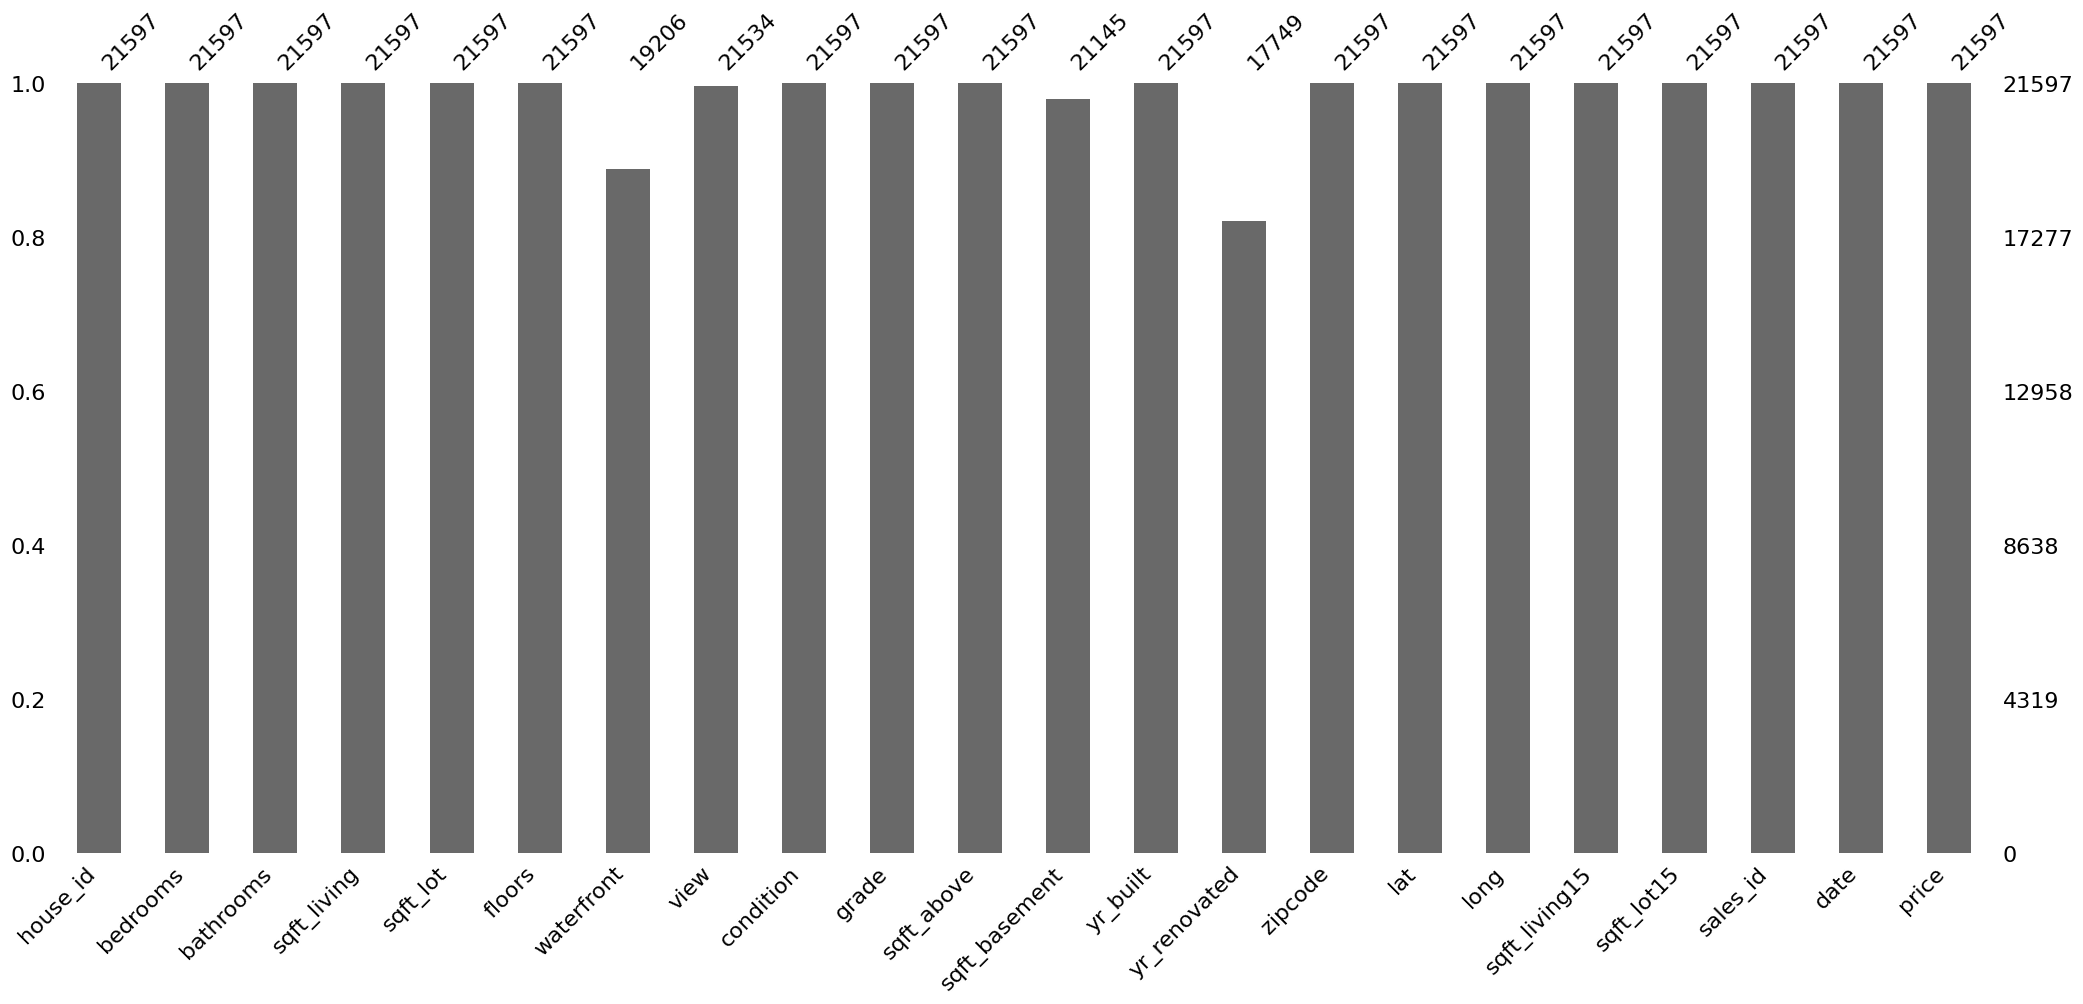

In [123]:
# plotting percentage of missing values per column
msno.bar(df)

<Axes: >

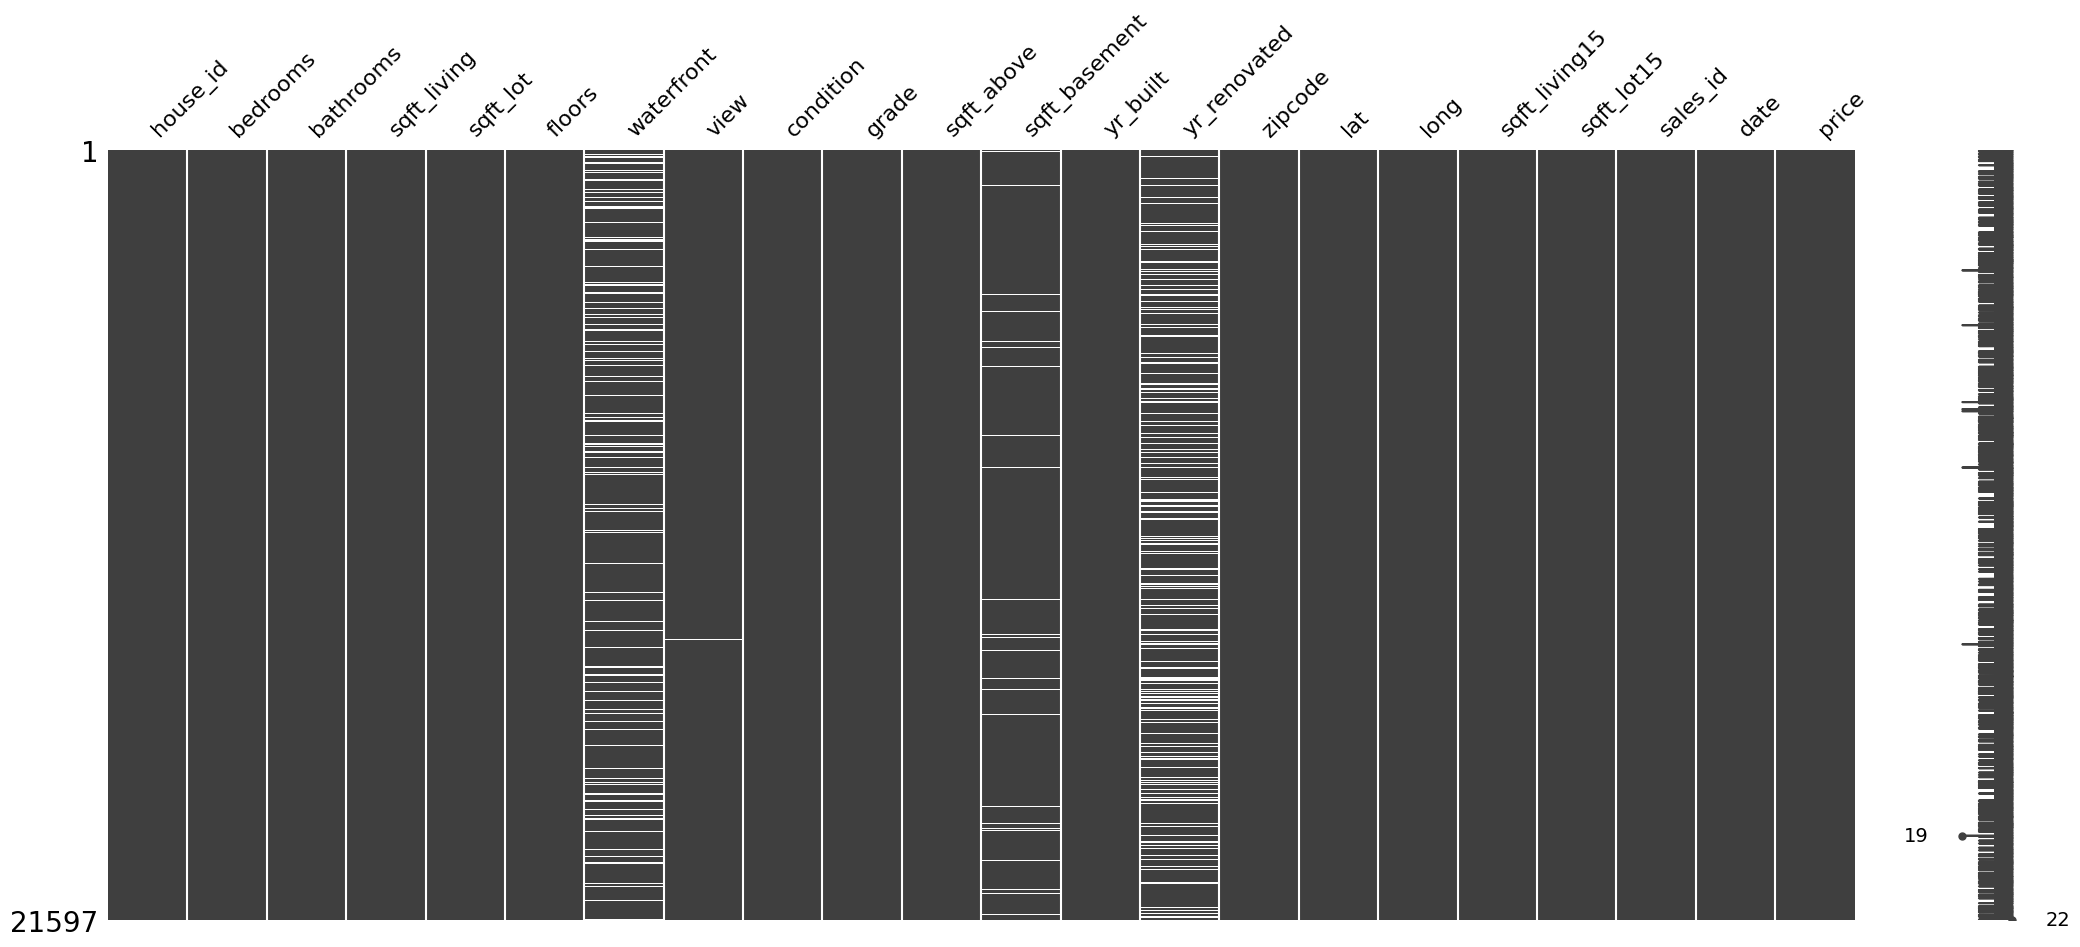

In [124]:
# plotting missing data matrix
msno.matrix(df)

In [125]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

missing data:
* waterfront        ~ 12%    not important
* year renovated    ~ 19%    likely important vor selling
* ft^2 of basement  ~  2%    may be important for buying
* view              < 10     not important
* no correlation between missing values

=> To fullfill the clients needs dealing with missing values is not neccessary.

#### Get Statistics

In [126]:
# check statistics
print(df.loc[:, :'grade'].describe())
print('\n', df.loc[:, 'sqft_above':].describe())

           house_id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.115826   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.768984    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  
count  21597.000000  19206.000000  21534.000000  21597.000000  21597.000000  
mean       1.494096      0.007602      0.233863      3.409825      7.657915  
std        0.539683      0.086858      0.765686      0

#### Check number of unique values

In [127]:
# check how many unique values are in each column
df.nunique()

house_id         21420
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               752
sqft_living15      777
sqft_lot15        8682
sales_id         21597
date               372
price             3622
dtype: int64

#### Look at some of the Values

In [128]:
# print unique values for assessable columns
for i in df.columns:
    if df[i].nunique() < 71:
        print(i)
        print(np.sort(df[i].unique()))

bedrooms
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 33.]
bathrooms
[0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75
 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.5  7.75
 8.  ]
floors
[1.  1.5 2.  2.5 3.  3.5]
waterfront
[ 0.  1. nan]
view
[ 0.  1.  2.  3.  4. nan]
condition
[1 2 3 4 5]
grade
[ 3  4  5  6  7  8  9 10 11 12 13]
yr_renovated
[    0. 19340. 19400. 19440. 19450. 19460. 19480. 19500. 19510. 19530.
 19540. 19550. 19560. 19570. 19580. 19590. 19600. 19620. 19630. 19640.
 19650. 19670. 19680. 19690. 19700. 19710. 19720. 19730. 19740. 19750.
 19760. 19770. 19780. 19790. 19800. 19810. 19820. 19830. 19840. 19850.
 19860. 19870. 19880. 19890. 19900. 19910. 19920. 19930. 19940. 19950.
 19960. 19970. 19980. 19990. 20000. 20010. 20020. 20030. 20040. 20050.
 20060. 20070. 20080. 20090. 20100. 20110. 20120. 20130. 20140. 20150.
    nan]
zipcode
[98001 98002 98003 98004 98005 98006 98007 98008 98010 98011 98014 98019
 98022 98023 98024 98027 98028

In [129]:
df.yr_renovated.value_counts()

yr_renovated
0.0        17005
20140.0       73
20130.0       31
20030.0       31
20070.0       30
           ...  
19510.0        1
19530.0        1
19460.0        1
19760.0        1
19480.0        1
Name: count, Length: 70, dtype: int64

#### Check wether there is a correlation between condition and grading system

In [130]:
# check for grade and condition to assess if high or low values are better, is there a correlation?
print(df.groupby('condition')['grade'].median())
print(df.groupby('grade')['condition'].median())

condition
1    6.0
2    7.0
3    8.0
4    7.0
5    7.0
Name: grade, dtype: float64
grade
3     5.0
4     3.0
5     3.0
6     3.0
7     3.0
8     3.0
9     3.0
10    3.0
11    3.0
12    3.0
13    3.0
Name: condition, dtype: float64


#### Check for correlations between price with either condition and grade

In [131]:
# check correlation of prices with condition and grade
print(df.groupby('condition')['price'].median())
print(df.groupby('grade')['price'].median())

condition
1    270000.0
2    279000.0
3    450250.0
4    440000.0
5    526000.0
Name: price, dtype: float64
grade
3      262000.0
4      200000.0
5      228700.0
6      275276.5
7      375000.0
8      510000.0
9      720000.0
10     914327.0
11    1280000.0
12    1820000.0
13    2980000.0
Name: price, dtype: float64


We see a weak correlation of price with condition and a strong one for price with grade.

#### More statistics

In [132]:
# check number of houses in each category of condition and grade
print(df.groupby('condition')['house_id'].count())
print(df.groupby('grade')['house_id'].count())

condition
1       29
2      170
3    14020
4     5677
5     1701
Name: house_id, dtype: int64
grade
3        1
4       27
5      242
6     2038
7     8974
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: house_id, dtype: int64


## Cleaning

We remove every zero entry in 'yr_renovated' and 'sqft_basement' because a house can not be renovated in year zero and a basement with zero squarefootage corresponds with the house having no basement at all..
We substitute outliers for 'sqft_lot' and 'sqft_lot15' with lower high values to facilitate visualization.
We do the same for prices but do not save it for the analysis.

7700000.0
1970000.0
1160000.0


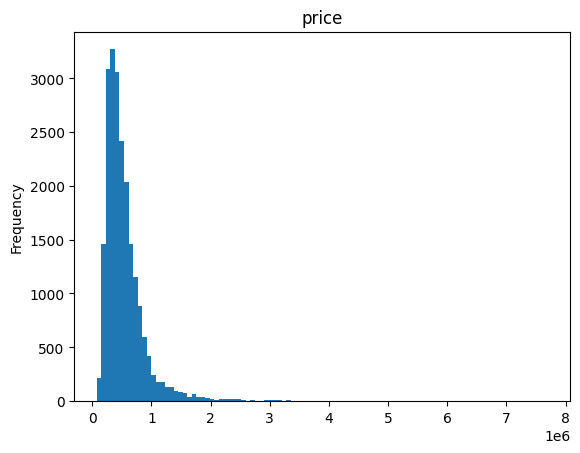

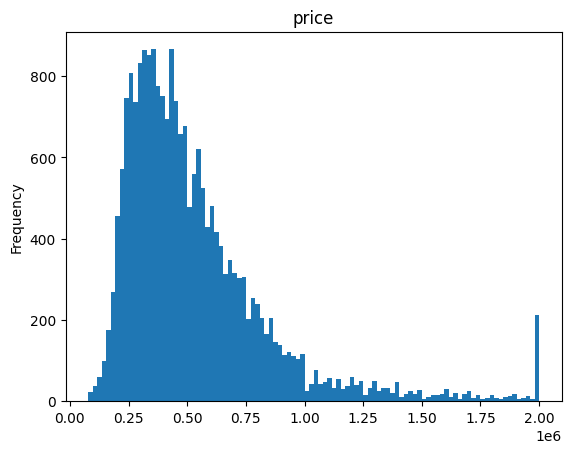

In [133]:
df_clean = df.copy()

# cleaning yr_renovated
df_clean.loc[df_clean['yr_renovated'] == 0., 'yr_renovated'] = np.nan
df_clean['yr_renovated'] = df_clean['yr_renovated'].apply(lambda x: x/10)

# cleaning sqft_basement
df_clean.loc[df_clean['sqft_basement'] == 0., 'sqft_basement'] = np.nan

# cleaning sqft_lot
df_clean.loc[df_clean['sqft_lot'] > 100000., 'sqft_lot'] = 100000.

# cleaning sqft_lot15
df_clean.loc[df_clean['sqft_lot15'] > 100000., 'sqft_lot15'] = 100000.

# just looking at price
print(df.price.max())
print(df.price.quantile(0.99))
print(df.price.quantile(0.95))
df_clean.price.plot(kind='hist', title='price', sharex=False, sharey=False, bins=100)
plt.show()
df_price = df_clean.price.copy()
df_price.loc[df_price > 2000000.] = 2000000.
df_price.plot(kind='hist', title=i, sharex=False, sharey=False, bins=100)
plt.show()

#### Check histograms

house_id
bedrooms


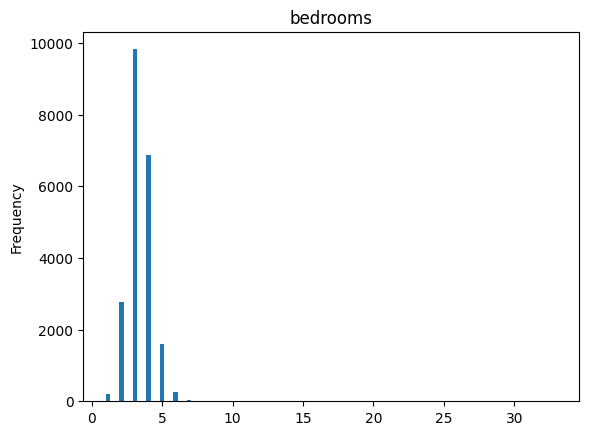

bathrooms


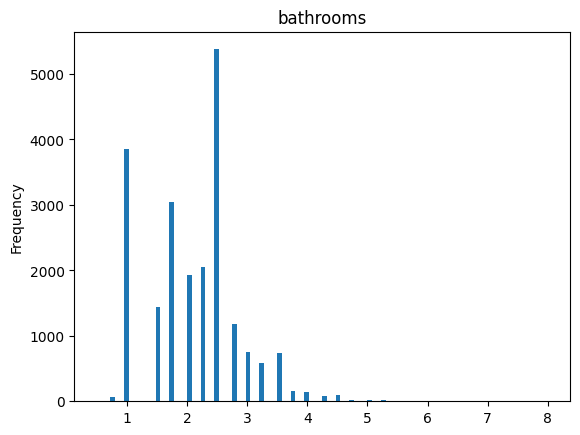

sqft_living


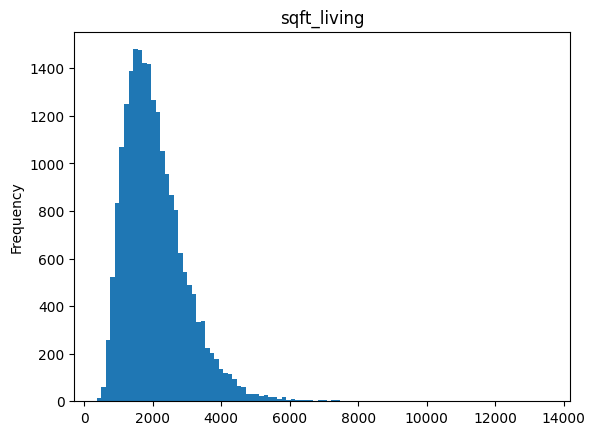

sqft_lot


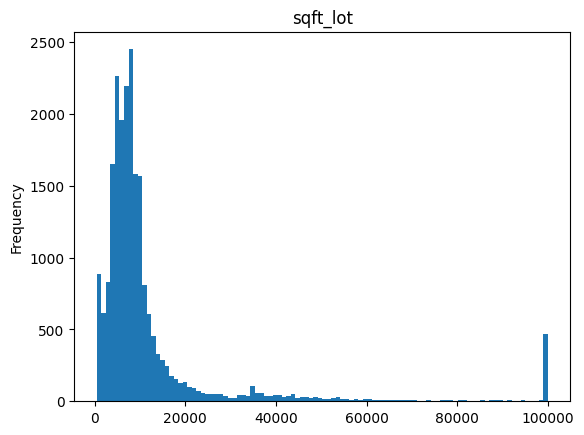

floors


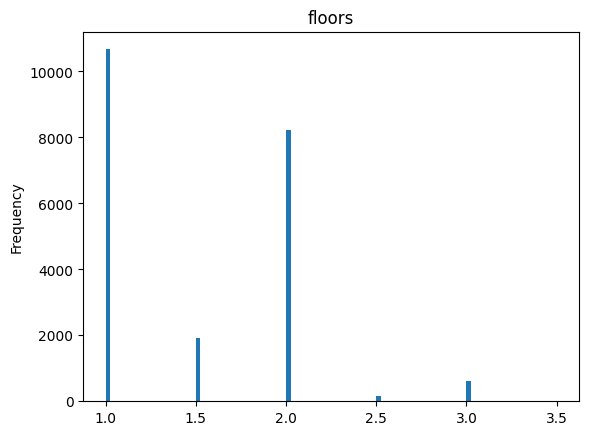

waterfront
view
condition
grade
sqft_above


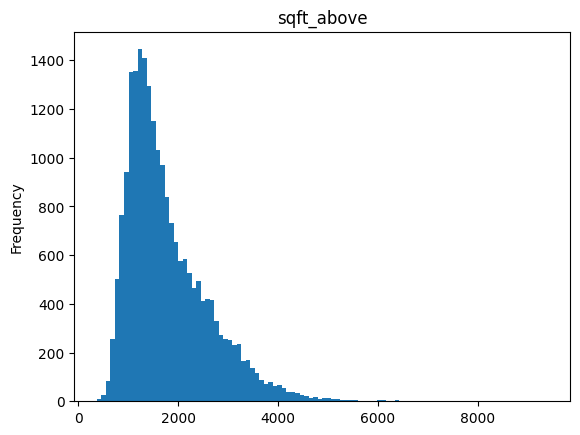

sqft_basement


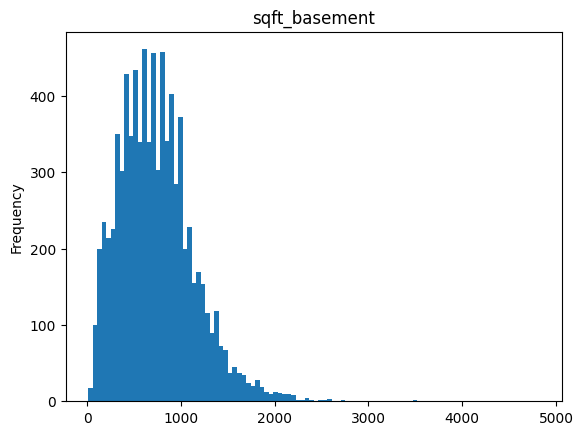

yr_built


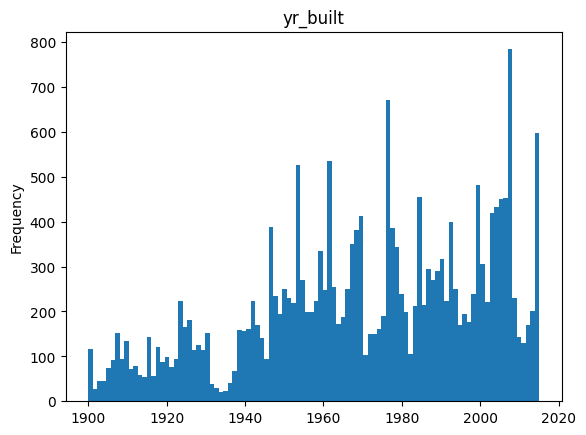

yr_renovated


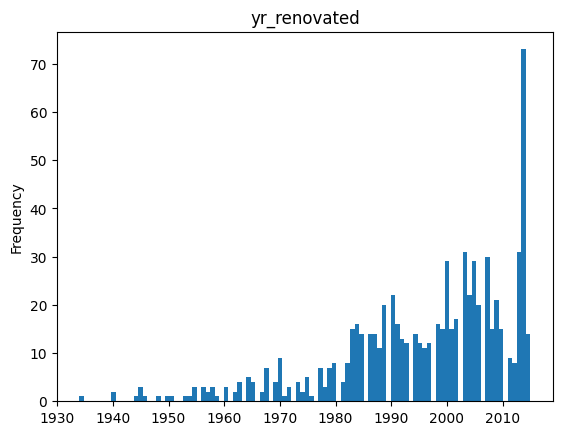

zipcode
lat


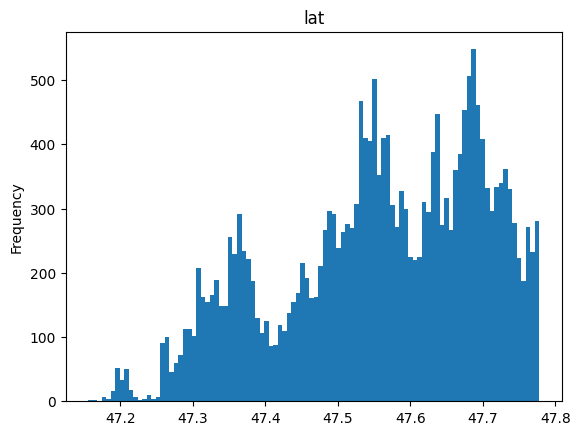

long


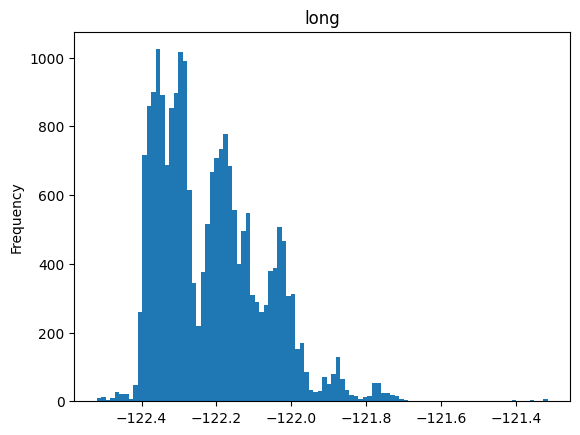

sqft_living15


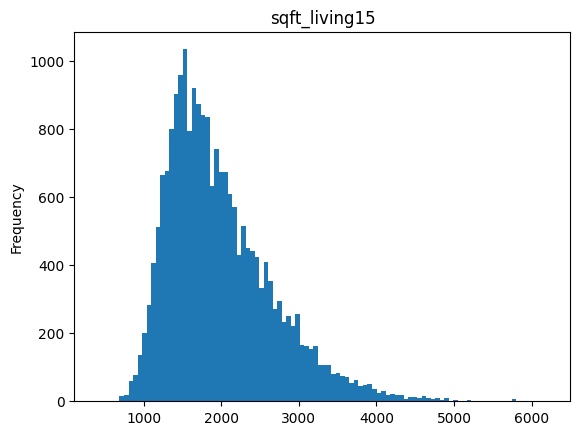

sqft_lot15


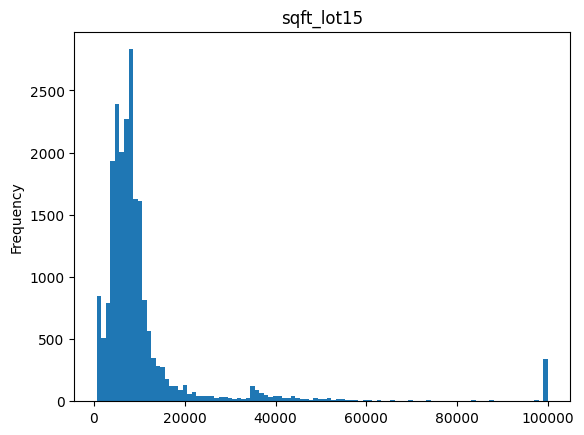

sales_id
date
price


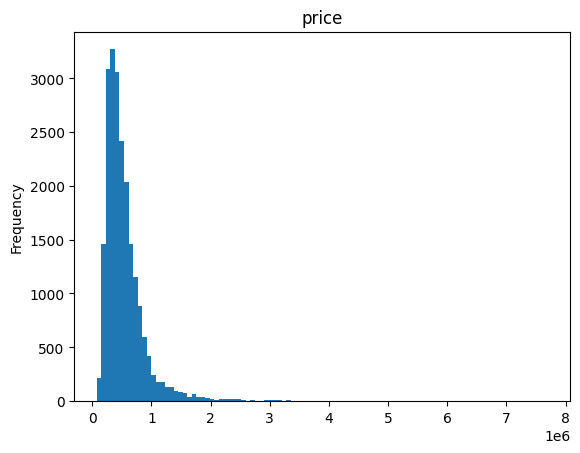

In [134]:
# check histograms of continous variables
for i in df_clean.columns:
    print(i)
    if i in ['house_id', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'sales_id', 'date']:
        pass
    else:
        df_clean[i].plot(kind='hist', title=i, sharex=False, sharey=False, bins=100)
        plt.show()

waterfront


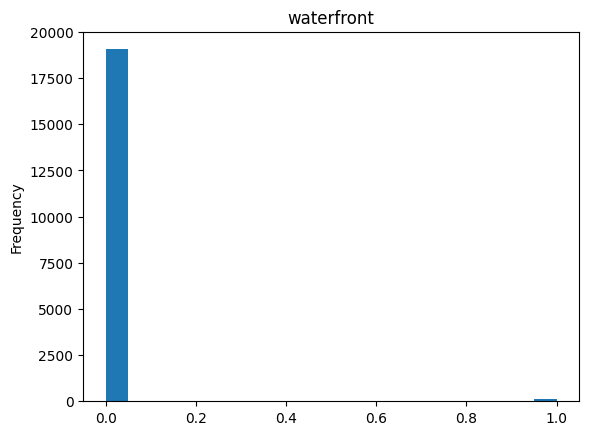

view


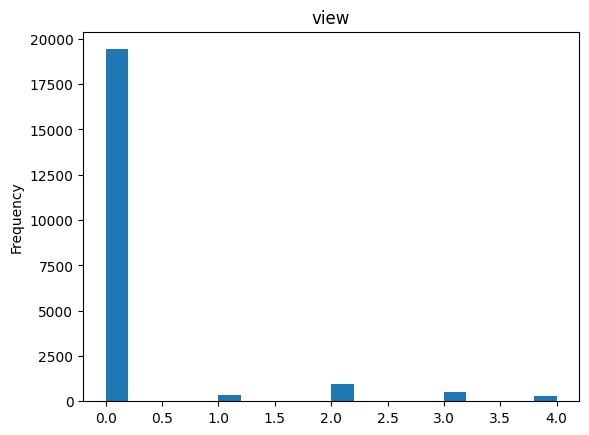

condition


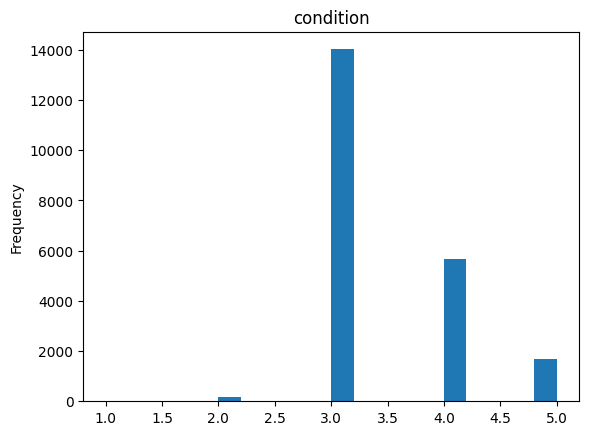

grade


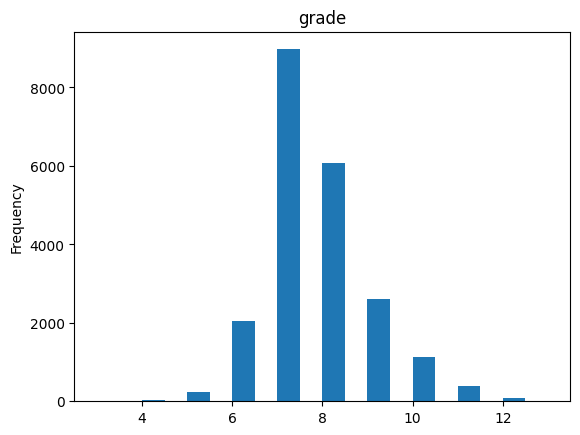

zipcode


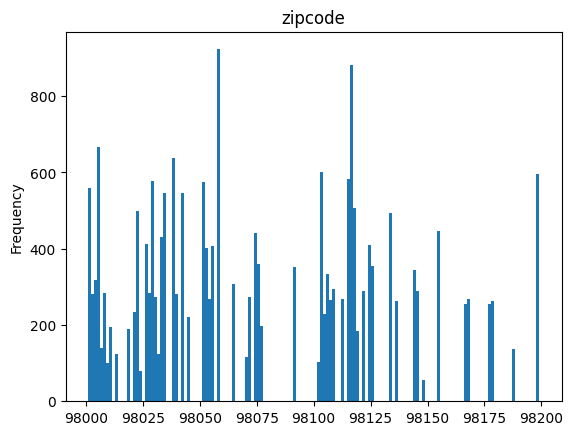

In [135]:
# check histograms of categorial variables
for i in df_clean.columns:
    if i not in ['waterfront', 'view', 'condition', 'grade', 'zipcode']:
        pass
    elif i == 'zipcode':
        print(i)
        df_clean[i].plot(kind='hist', title=i, bins=150)
        plt.show()
    else:
        print(i)
        df_clean[i].plot(kind='hist', title=i, bins=20)
        plt.show()

#### Check sales

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 7316 to 16580
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       21597 non-null  int64         
 1   bedrooms       21597 non-null  float64       
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  float64       
 6   condition      21597 non-null  int64         
 7   grade          21597 non-null  int64         
 8   sqft_above     21597 non-null  float64       
 9   sqft_basement  8318 non-null   float64       
 10  yr_built       21597 non-null  int64         
 11  zipcode        21597 non-null  int64         
 12  lat            21597 non-null  float64       
 13  long           21597 non-null  float64       
 14  sqft_living15  21597 non-null  float64       
 15  sqft_lot15     21597 

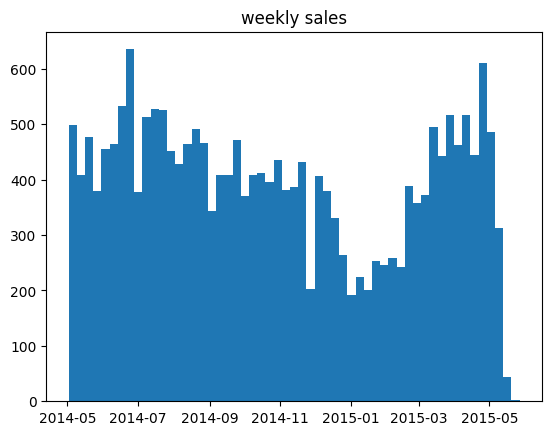

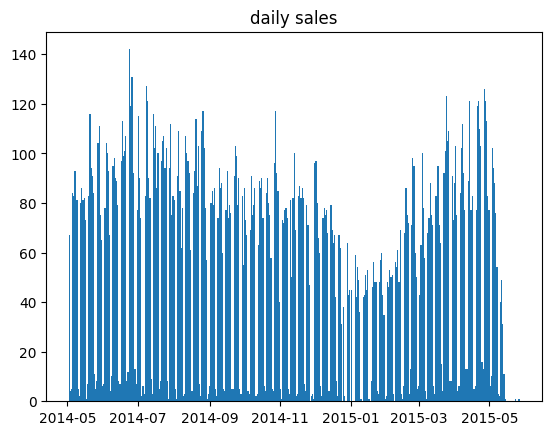

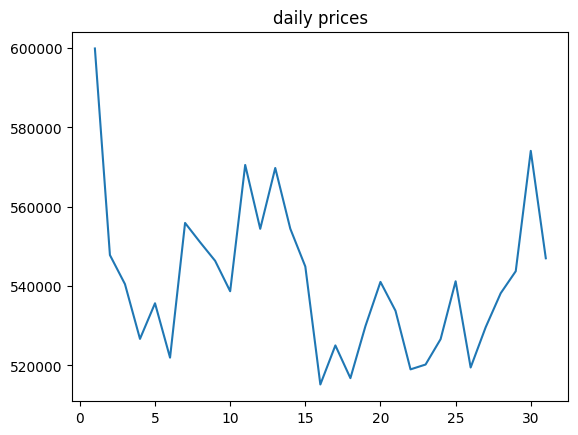

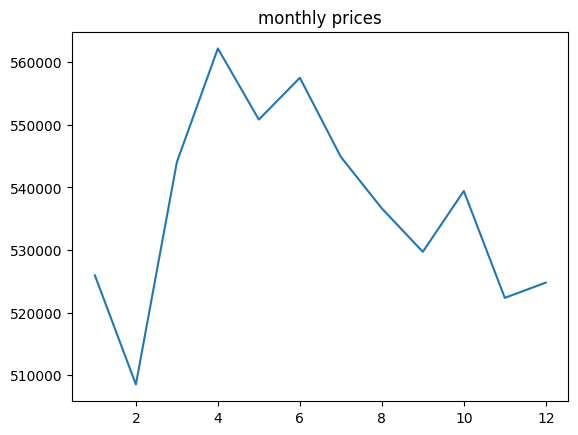

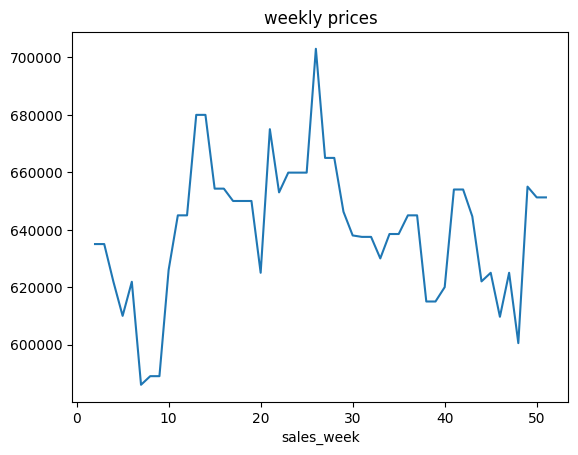

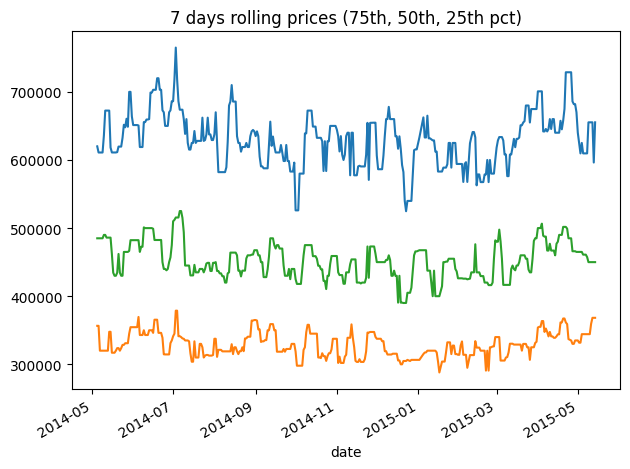

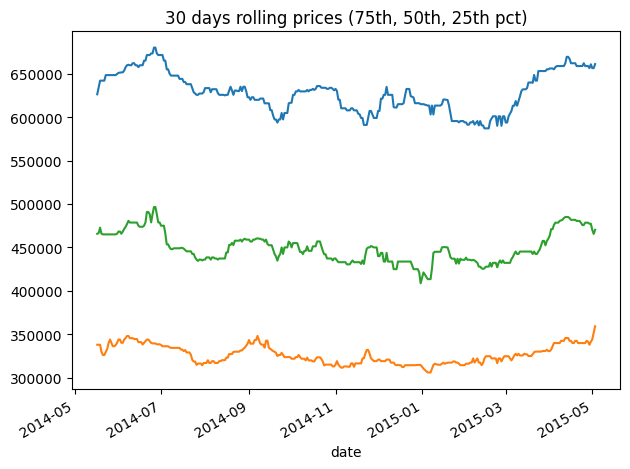

In [136]:
# check sales

df_sales = df_clean.loc[:,
    ['house_id', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
    'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price',
    'date']
].sort_values('date')

# Generate some usfull variables
df_sales.date = pd.to_datetime(df_sales.date)
df_sales.eval('sales_year = date.dt.year', inplace=True)
df_sales.eval('sales_month = date.dt.month', inplace=True)
df_sales.eval('sales_day = date.dt.day', inplace=True)
df_sales['sales_week'] = df_sales['date'].apply(lambda x: x.isocalendar()[1])

# Check new dataframe
print(df_sales.info())
print(df_sales.sales_week.unique())

# Plot sales histograms on diffferent time scales
plt.hist(df_sales.date, bins=391//7)
plt.title('weekly sales')
plt.show()
plt.hist(df_sales.date, bins=391)
plt.title('daily sales')
plt.show()
df_group_day = df_sales.groupby(df_sales.sales_day).mean()
plt.plot(df_group_day.price)
plt.title('daily prices')
plt.show()
df_group_month = df_sales.groupby(df_sales.sales_month).mean()
plt.plot(df_group_month.price)
plt.title('monthly prices')
plt.show()
df_group_week = df_sales.groupby(df_sales.sales_week)['price'].quantile(0.75).rolling(3, center=True).quantile(0.5)
df_group_week.plot()
plt.title('weekly prices')
plt.show()
df_group_7days = df_sales.groupby(df_sales.date).quantile(0.75).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
df_group_7days = df_sales.groupby(df_sales.date).quantile(0.25).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
df_group_7days = df_sales.groupby(df_sales.date).quantile(0.5).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
plt.title('7 days rolling prices (75th, 50th, 25th pct)')
plt.tight_layout()
plt.savefig(p_images+"price_all_houses_7days_roll_mean.png",dpi=300)
plt.show()
df_group_14days = df_sales.groupby(df_sales.date).quantile(0.75).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
df_group_14days = df_sales.groupby(df_sales.date).quantile(0.25).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
df_group_14days = df_sales.groupby(df_sales.date).quantile(0.5).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
plt.title('30 days rolling prices (75th, 50th, 25th pct)')
plt.tight_layout()
plt.savefig(p_images+"price_all_houses_30days_roll_mean.png",dpi=300)
plt.show()

df_sales.to_csv('../data/sales.csv',index=False)